In [76]:
import altair as alt
import pandas as pd
import datetime

pd.set_option('display.expand_frame_repr', False)

source = "https://raw.githubusercontent.com/charlesjlee/data-viz/master/altair/20190407%20-%20Reddit%2C%20April%20Fool's/df.csv"
df = pd.read_csv(source)
df.head()

,post_time,comment_time,is_original_post,score,url,author,post_karma,comment_karma,is_self_comment
0,2019-04-02 00:45:43,2019-04-02 00:45:43,True,0,True,NaN,0,0,True
1,2019-04-02 00:27:06,2019-04-02 00:27:06,True,8,True,mattindustries,8579,115252,True
2,2019-04-02 00:27:06,2019-04-02 00:27:23,False,2,False,mattindustries,8579,115252,True
3,2019-04-02 00:27:06,2019-04-02 00:31:24,False,1,False,plottal,1429,37517,False
4,2019-04-02 00:27:06,2019-04-02 00:34:56,False,1,False,CyborgCanoe,45,88,False


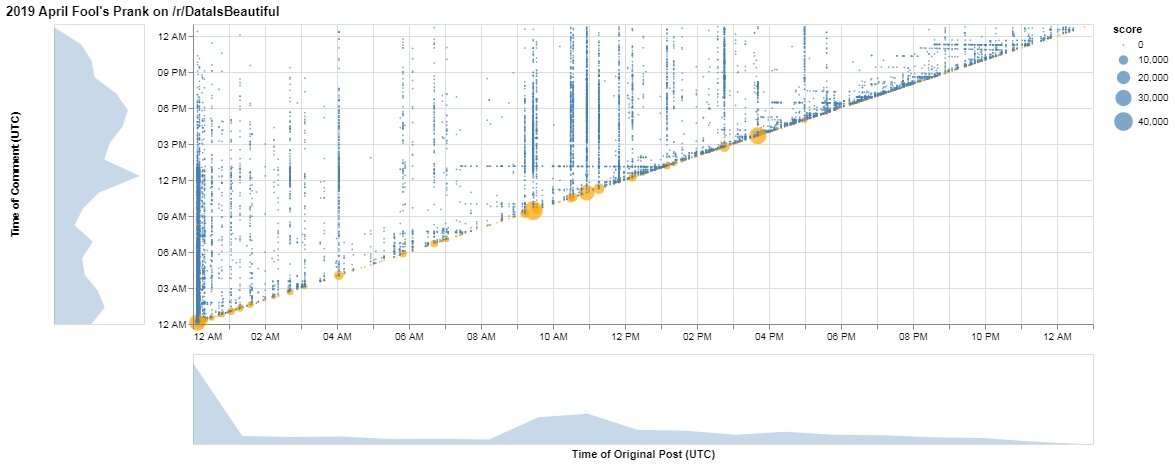

In [144]:
start = datetime.datetime(2019, 4, 1, 0, 0, 0).isoformat()
start2 = datetime.datetime(2019, 3, 31, 23, 40, 0).isoformat() # otherwise buckets overflow axis
end = datetime.datetime(2019, 4, 2, 1, 0, 0).isoformat()
bar_scale = alt.Scale(domain=[start, end])
bar_scale2 = alt.Scale(domain=[start2, end])

blank_axis_options = {'labels':False, 'domain':False, 'ticks':False, 'grid':False}

tooltip = [ 
    alt.Tooltip('author:N', title='Author'),
    alt.Tooltip('post_time:T', timeUnit='hoursminutes', title='Time of Original Post'),
    alt.Tooltip('comment_time:T', timeUnit='hoursminutes', title='Time of Comment'),
    alt.Tooltip('score:Q', title='Post Score'),
    alt.Tooltip('post_karma:Q', title="Author's post karma"),
    alt.Tooltip('comment_karma:Q', title="Author's comment karma"),
]

points = alt.Chart().mark_circle().encode(
    x=alt.X('post_time:T', title='', axis=alt.Axis(format='%I %p'), scale=bar_scale),
    y=alt.Y('comment_time:T', title='', axis=alt.Axis(format='%I %p'), scale=bar_scale),
    color=alt.condition(
        alt.datum.is_original_post == 'True',
        alt.value("orange"),
        alt.value("steelblue"),
    ),
    size='score:Q',
    tooltip=tooltip,
).properties(
    selection=brush,
    width=900,
    height=300,
)

y_bar = alt.Chart().mark_area(opacity=0.3).encode(
    x=alt.X('count()', axis=alt.Axis(title='', **blank_axis_options)),
    y=alt.Y('comment_time:T', bin=alt.Bin(maxbins=24), axis=alt.Axis(title='Time of Comment (UTC)', format='%I %p', **blank_axis_options), scale=bar_scale2),
).properties(
    width=90,
)

x_bar = alt.Chart().mark_area(opacity=0.3).encode(
    x=alt.X('post_time:T', bin=alt.Bin(maxbins=24), axis=alt.Axis(title='Time of Original Post (UTC)', format='%I %p', **blank_axis_options), scale=bar_scale2),
    y=alt.Y('count()', axis=alt.Axis(title='', **blank_axis_options)),
).properties(
    height=90,
    width=900,
)

chart = (y_bar | (points & x_bar)).properties(
    title="2019 April Fool's Prank on /r/DataIsBeautiful",
    spacing=10,
    data=source,
)

chart